# **Analisis Sentimen Pada Review Pakaian Wanita Di E-commerce**

# Import Library

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm, naive_bayes
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import seaborn as sns
import re

from matplotlib.pyplot import figure

import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import pandas as pd
import torch
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm
 
from nltk.tokenize import TweetTokenizer
import os
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


##customer pipeline function
from sklearn.base import BaseEstimator, TransformerMixin

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Required prediction modelling libraries are imported
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score
import xgboost as XGB
from imblearn.over_sampling import SMOTE

#Ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm, naive_bayes
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import seaborn as sns
import re

import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords
from matplotlib.pyplot import figure

import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import pandas as pd
import torch
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm
 
from nltk.tokenize import TweetTokenizer
import os
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords

import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Problem Statement**

Sebanyak 18.2% pelanggan memilih tidak merekomendasikan produk pakaian wanita di e-commerce X. Jika pelanggan memberikan rating dan review buruk, maka dikhawatirkan akan mendorong calon pembeli lain untuk tidak membeli produk pakaian wanita di e-commerce X. 


# **Goals**

Perusahaan perlu mengetahui hal apa yang membuat pelanggan bersedia memberikan rekomendasi di e-commerce berdasarkan review yang mereka tulis. 

Projek ini bertujuan untuk menganalisis sentimen dari ulasan pelanggan terhadap pakaian wanita di suatu situs e-commerce. Adapun hal yang akan dibahas dalam projek ini adalah:
1. Mengklasifikasikan review yang ditulis konsumen berdasarkan kategori positif, negatif, dan netral. 
2. Mengetahui kata apa yang paling sering ditulis oleh konsumen pada reviewnya.
3. Memberikan rekomendasi kepada stakeholder hal apa yang perlu ditindaklanjuti dari review konsumen.

# **Data Collection**

Data ini berisi tentang kumpulan ulasan yang ditulis oleh pelanggan terkait dengan E-Commerce Pakaian Wanita. Dalam data ini terdapat sembilan fitur yang mencakup 23486 baris. Data dapat diakses di https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews 

# **Data Understanding**


1. Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
2. Age: Positive Integer variable of the reviewers age.
3. Title: String variable for the title of the review.
4. Review Text: String variable for the review body.
5. Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
6. Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
7. Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
8. Division Name: Categorical name of the product high level division.
9. Department Name: Categorical name of the product department name.
10. Class Name: Categorical name of the product class name.

In [ ]:
# Load data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# **Data Preprocessing**

## Cek Info Data

In [ ]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Observasi:
1. Terdapat 6 kolom dengan tipe data integer
2. Terdapat 5 kolom dengan tipe data object

## Cek Nilai Unik

In [ ]:
# check the unique values for each column
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

Observasi"
1. Pada kolom `Clothing ID`. `Age`, `Title`, `Review Text`, dan `Positive Feedback Count` terdiri dari banyak nilai unik, sebab nilai tersebut berasal dari costumer
2. `Rating`, `Recommended IND`, `Division Name`, `Department Name`, dan `Class Name` terdiri dari beberapa nilai unik yang termasuk dalam beberapa kategori.


## Cek Missing Value

In [ ]:
# number of missing values per column
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Observasi:

Terdapat 3810 missing value pada kolom `Title`, 845 missing value pada kolom `Review Text`, serta masing-masing sebanyak 14 missing value pada kolom `Division Name`, `Department Name`, dan` Class Name`. Untuk mengatasi missing value maka akan dilakukan drop data sebab peluang munculnya missing value masih kurang dari 5% (0.16%).

In [ ]:
df = df.dropna()
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
# Check target comparison
target_var = df['Recommended IND'].value_counts(normalize=True)

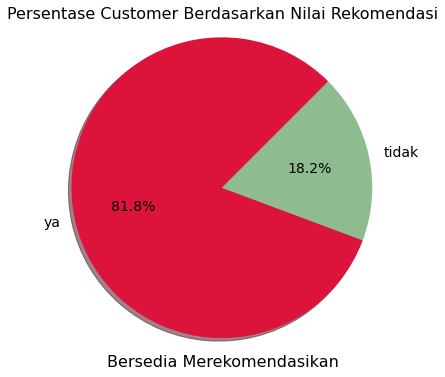

In [ ]:
plt.figure(figsize=(6,6))

conversion_rate = target_var.index
count = target_var.values
colors= ['#DC143C','#8FBC8F']

plt.pie(count, labels=['ya','tidak'],
        shadow=True,
        colors=colors, 
        autopct='%1.1f%%',
        startangle=45,
        textprops={'fontsize': 14})

plt.title('Persentase Customer Berdasarkan Nilai Rekomendasi',fontsize=16)
plt.xlabel('Bersedia Merekomendasikan',fontsize=16)
plt.axis('equal')
plt.show()

## Menghapus Angka
Dilakukan penghapusan pada review yang mengandung angka

In [ ]:
#mengahpus angka pada kolom Review Text
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['Review Text'] = df['Review Text'].apply(lambda x: cleaning_numbers(x))
df['Review Text'].head()

2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses, but this one is no...
6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

## Menghapus Tanda Baca

In [ ]:
#mengahapus tanda baca
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['Review Text']= df['Review Text'].apply(lambda x: cleaning_punctuations(x))
df['Review Text'].head()

2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses but this one is not...
6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

## Menghapus Repeating Characters

In [ ]:
#menghapus repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['Review Text'] = df['Review Text'].apply(lambda x: cleaning_repeating_char(x))
df['Review Text'].head()


2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses but this one is not...
6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

## Menghapus URL
Menghapus URL yang kemungkinan dicantumkan oleh konsumen pada review produk yang mereka beli

In [ ]:
#menghapus jika ada url pada kolom review text
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['Review Text'] = df['Review Text'].apply(lambda x: cleaning_URLs(x))
df['Review Text'].head()


2    I had such high hopes for this dress and reall...
3    I love love love this jumpsuit its fun flirty ...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses but this one is not...
6    I aded this in my basket at hte last mintue to...
Name: Review Text, dtype: object

## Case Folding
Merubah kalimat pada review menjadi  huruf kecil

In [ ]:
## merubah kalimat menjadi huruf kecil
df['Review Text'] = df['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review Text'][2]

'i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c'

## Remove Stopwords
Pembuangan kata-kata yang dianggap tidak penting. Langkah ini dilakukan  supaya  perhitungan  lebih  berfokus  pada  kata-kata  yang  jauh  lebih penting

In [ ]:
## stopwords dalam bahasa inggris 
stpwordlist=['i', 'me', 'my', 'myself', 'we', 'not','dont','the','our', 'ours', 'im','ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did','doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'much','didnt','make','two','made','lot','because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up',
 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']

In [ ]:
#membuang kata yang dianggap tidak penting
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stpwordlist])
df['Review Text'] = df['Review Text'].apply(lambda text: cleaning_stopwords(text))
df['Review Text'].head()

2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dresses one petite feet tall ...
6    aded basket hte last mintue see would look lik...
Name: Review Text, dtype: object

## Tokenization
Kalimat  dipotong  atau  dipecah  berdasarkan  tiap  kata  yang menyusunnya

In [ ]:
#melakukan tokenization
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
df['Review Text']=df['Review Text'].apply(tt.tokenize)
df['Review Text'].head()

2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
5    [love, tracy, reese, dresses, one, petite, fee...
6    [aded, basket, hte, last, mintue, see, would, ...
Name: Review Text, dtype: object

## Stemming
Merupakan tahap mencari root (bentuk dasar) dari tiap kata

In [ ]:
#Stemming
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
df['Review Text'] = df['Review Text'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['Review Text'].head()

2    high hope dress realli want work initi order p...
3    love love love jumpsuit fun flirti fabul everi...
4    shirt flatter due adjust front tie perfect len...
5    love traci rees dress one petit feet tall usua...
6    ade basket hte last mintu see would look like ...
Name: Review Text, dtype: object

# **Eksplorasi Data**

In [ ]:
#mengdrop kolom yang tidak memberikan informasi penting
data=df.drop(df.columns[[0,1,3]], axis = 1)


In [ ]:
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,60,high hope dress realli want work initi order p...,3,0,0,General,Dresses,Dresses
3,50,love love love jumpsuit fun flirti fabul everi...,5,1,0,General Petite,Bottoms,Pants
4,47,shirt flatter due adjust front tie perfect len...,5,1,6,General,Tops,Blouses
5,49,love traci rees dress one petit feet tall usua...,2,0,4,General,Dresses,Dresses
6,39,ade basket hte last mintu see would look like ...,5,1,1,General Petite,Tops,Knits


## Descriptive Statistics

In [ ]:
#memisahkan kolom berdasarkan tipe datanya
categoricals = ['Division Name', 'Department Name','Class Name']
numericals = ['Age','Rating', 'Recommended IND','Positive Feedback Count']

In [ ]:
# Categoricals Statistical Summary
data[categoricals].describe()

,Division Name,Department Name,Class Name
count,19662,19662,19662
unique,3,6,20
top,General,Tops,Dresses
freq,11664,8713,5371


Observasi"
1. `Devision Name` berisikan kolom dengan ketegori produk yang terbagi menjadi 3 jenis secara umum, yaitu General, General Petite, dan Intimate. Mayoritas produk yang dibeli konsumen adalah produk dengan kategori General. 
2. `Department Name`membagi produk menjadi 6 kategori, yaitu Intimate, Dresses, Bottoms, Tops, Jacket, dan Trend. Sebagian besar produk yang dibeli konsumen adalah produk kategori Tops.
3. `Class Name` merupakan kolom yang berisikan jenis produk. Jenis produk yang dijual terdapat 20 jenis. Namun mayoritas produk yang dibeli konsumen adalah dresses. 

In [ ]:
# Numericals Statistical Summary
data[numericals].describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,43.260808,4.183145,0.818177,2.652477
std,12.258122,1.112224,0.385708,5.834285
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


Observasi:

1. Rating terdiri dari angka min 1 dan max 5. Nilai mean-nya adalah 4.18. Jadi sebagian besar konsumen memberikan rating yang tinggi pada produk yang mereka beli di e-commerce X
2. Kolom `Recommended IND` memiliki nilai 0 dan 1. Nilai mean-nya adalah 0.81 artinya sebagian besar konsumen bersedia merekomendasikan produk yang mereka beli di e-commerce X
2. Kolom `Positive Feedback Count`menandakan seberapa banyak konsumen yang melihat review positif yang ditulis oleh konsumen lain. Dari seluruh nilai `Positive Feedback Count`, sebanyak 122 konsumen menyetujui review positif yang ditulis oleh seorang konsumen. Sedangkan rata-rata review positif yang ditulis oleh seorang konsumen, dilihat oleh 3 orang konsumen lain.

## Univariat Analysis

Cek Outlier

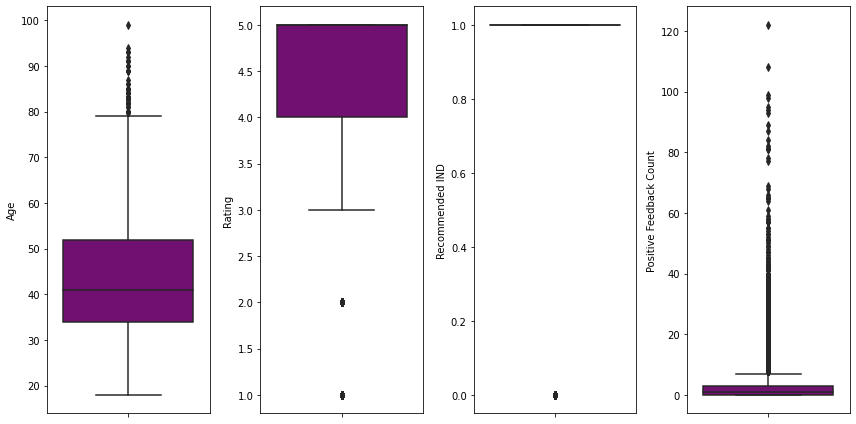

In [ ]:
#checking outlier
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='purple')
    plt.tight_layout()

Observasi:
Terdapat outlier pada ketiga kolom. 
1. Pada kolom `Age` terdapat outlier. Sedangkan sebagian besar konsumen berumur 30-50 tahun.
2. Pada kolom `Rating`, outlier terjadi karena terdapat konsumen yang memberikan rating  1 dan 2 pada produk yang mereka beli. Sedangkan mayoritas konsumen memberikan rating antara 3 sampai 5.
3. Pada kolom `Recommended IND`terjadi outlier karena nilainya hanya tersusun atas angka 1 = bersedia merekomendasikan, dan 0 = tidak bersedia.
3. Pada kolom `Positive Feedback Count`terjadi banyak sekali outlier yang disebabkan oleh beberapa review konsumen menarik perhatian konsumen lain hingga mencapai 120 orang. Sedangkan mayoritas review tidak dilihat oleh konsumen lain.
5. Outlier yang ada sengaja tidak di drop karena mengandung informasi penting untuk analisis selanjutnya.

In [ ]:
# Standardize Age menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['Age']])

StandardScaler()

In [ ]:
data['Std_Age'] = scaler.transform(data[['Age']])

In [ ]:
data[['Std_Age']].describe()

,Std_Age
count,1.966200e+04
mean,1.871941e-16
std,1.000025e+00
min,-2.060793e+00
25%,-7.555026e-01
50%,-1.844381e-01
75%,7.129489e-01
max,4.547239e+00


Normalitas Data

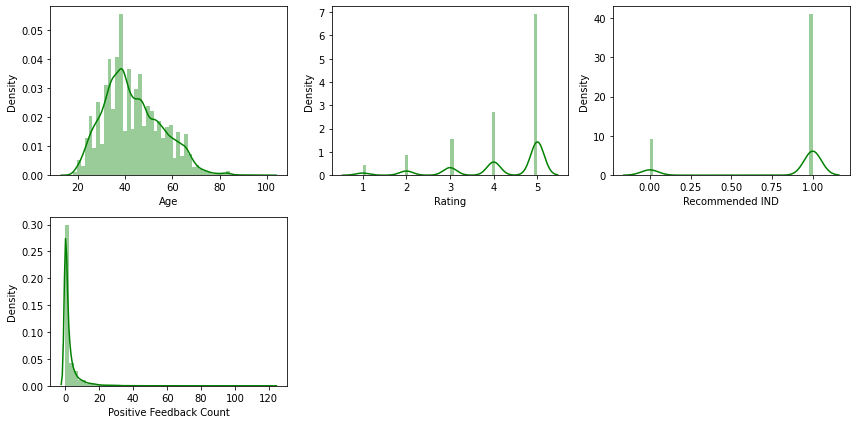

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

Observasi:
1. Pada kolom `Rating` dan `Recommended IND`tidak terlihat adanya normalitas data sebab data terdiri atas nilai kategori.
2. Pada kolom `Positive Feedback Count`, grafik terlihat condong ke kanan sebab adanya outlier.
3. Pada kolom `Age` terlihat adanya normalitas data walaupun bentuknya sedikit condong ke kanan karena adanya outlier.

## Multivariat Analysis

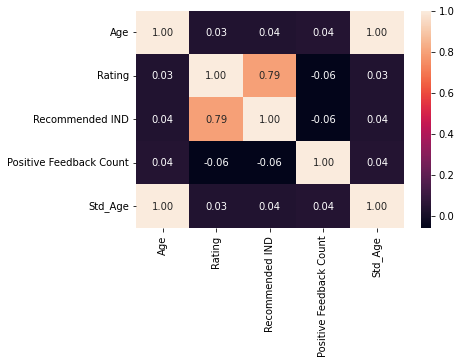

In [ ]:
# correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observasi:
1. Terdapat hubungan yang erat antara `Recommended IND` dan `Positive Feedback Count` dengan angka korelasi 0,79. Artinya konsumen yang bersedia merekomendasikan produk yang ia beli, akan menarik perhatian konsumen lain. Konsumen lain tersebut akan melihat atau menyukai review yang telah ditulis. 
2.Tidak ada hubungan yang berarti antara `Age`, `Rating` dan `Recommended IND`, melihat betapa kecilnya nilai korelasi.

## Business Insight

1. Melihat Kecenderungan Customer Memberikan Rekomendasi Berdasarkan Rating

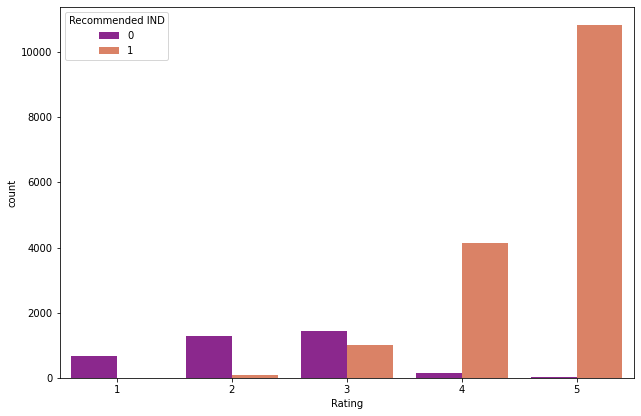

In [ ]:
plt.figure(figsize=(35,15))
plt.subplot(2,3,1)
sns.countplot(x='Rating', hue='Recommended IND', data=data, palette='plasma')

Observasi:
Customer yang memberikan rating 5 pada reviewnya cenderung mau merekomendasikan produk. Sedangkan customer yang memberikan rating 3 ke bawah cenderung tidak bersedia merekomendasikan produk.

2. Melihat Kecenderungan Customer Memberikan Rekomendasi Jenis Produk

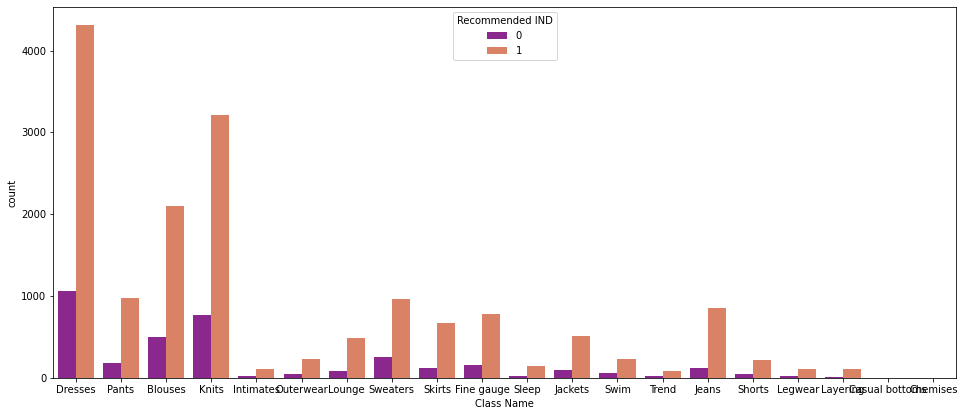

In [ ]:
plt.figure(figsize=(55,15))
plt.subplot(2,3,1)
sns.countplot(x='Class Name', hue='Recommended IND', data=data, palette='plasma')

3. Melihat Kecenderungan Customer Memberikan Rating Berdasarkan Jenis Pakaian

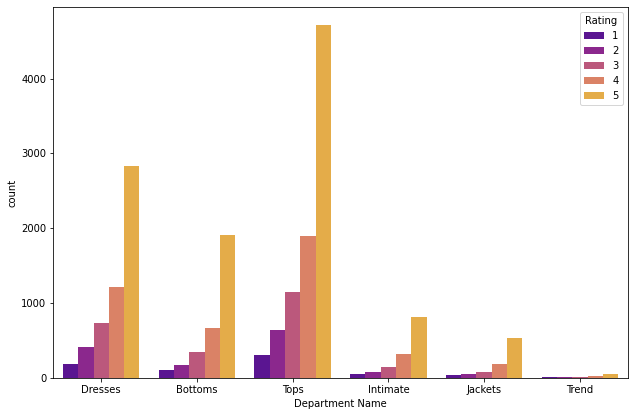

In [ ]:
plt.figure(figsize=(35,15))
plt.subplot(2,3,1)
sns.countplot(x='Department Name', hue='Rating', data=data, palette='plasma')

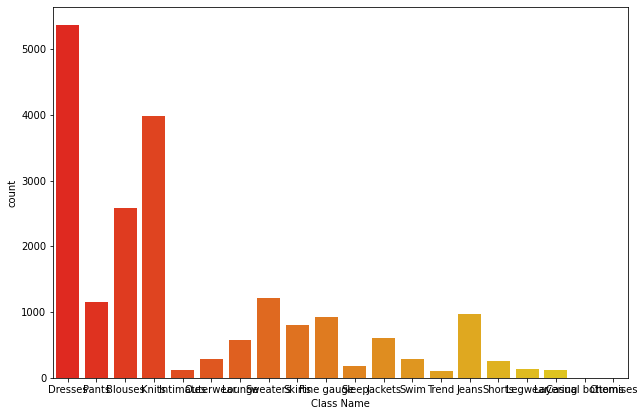

In [ ]:
plt.figure(figsize=(35,15))
plt.subplot(2,3,1)
sns.countplot(x='Class Name', data=data, palette='autumn')

# Sentimen Analisis

## Pelabelan

In [ ]:
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
#fungsi untuk mendapatkan subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#fungsi untuk mendapatkan polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#membuat dua kolom baru
data['subjectivity']=data['Review Text'].apply(getSubjectivity)
data['polarity']=data['Review Text'].apply(getpolarity)

#menampilkan datafraem baru
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Std_Age,subjectivity,polarity
2,60,high hope dress realli want work initi order p...,3,0,0,General,Dresses,Dresses,1.365594,0.388065,0.069412
3,50,love love love jumpsuit fun flirti fabul everi...,5,1,0,General Petite,Bottoms,Pants,0.549788,0.550000,0.520000
4,47,shirt flatter due adjust front tie perfect len...,5,1,6,General,Tops,Blouses,0.305046,0.658333,0.458333
5,49,love traci rees dress one petit feet tall usua...,2,0,4,General,Dresses,Dresses,0.468207,0.457143,0.085714
6,39,ade basket hte last mintu see would look like ...,5,1,1,General Petite,Tops,Knits,-0.347599,0.123333,-0.105000


In [ ]:
#fungsi untuk mendapatkan negative, neutral dan positive sentimen
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
    
data['sentimen']=data['polarity'].apply(getAnalysis)

#menampilkan dataFrame
data.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Std_Age,subjectivity,polarity,sentimen
2,60,high hope dress realli want work initi order p...,3,0,0,General,Dresses,Dresses,1.365594,0.388065,0.069412,positive
3,50,love love love jumpsuit fun flirti fabul everi...,5,1,0,General Petite,Bottoms,Pants,0.549788,0.550000,0.520000,positive
4,47,shirt flatter due adjust front tie perfect len...,5,1,6,General,Tops,Blouses,0.305046,0.658333,0.458333,positive
5,49,love traci rees dress one petit feet tall usua...,2,0,4,General,Dresses,Dresses,0.468207,0.457143,0.085714,positive
6,39,ade basket hte last mintu see would look like ...,5,1,1,General Petite,Tops,Knits,-0.347599,0.123333,-0.105000,negative


In [ ]:
#memeriksa jumlah sentimen positif, negatif, dan netral
tb_counts = data.sentimen.value_counts()
tb_counts

positive    17755
negative     1397
neutral       510
Name: sentimen, dtype: int64

In [ ]:
def percent_data(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

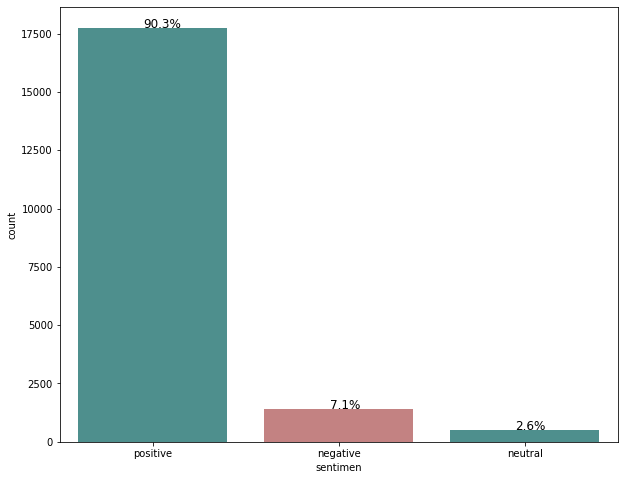

In [ ]:
#menggambarkan grafik persentase sentimen yang terbentuk
plt.figure(figsize = (10,8))
ax = sns.countplot(data=data, x='sentimen',palette=["#439A97", "#CE7777"])
percent_data(ax,data.sentimen)

In [ ]:
import plotly.express as px

In [ ]:
#presentase sentimen berdasarkan kemauan untuk memberikan rekomendasi
fig = px.histogram(data, 
            x="sentimen", 
            y="Recommended IND", 
            color="Recommended IND", 
            barmode="group",
            histnorm='percent',
            histfunc = "count",
            color_discrete_sequence=["orange", "blue"],
            title=f"Recommendation-Sentiment Relation")

fig.update_layout(yaxis_title="Percentage")
fig.update_xaxes(type='category')
fig.update_layout(yaxis={"ticksuffix":"%"})
fig.show()

## Wordcloud

1. Word Cloud Untuk Semua Label

In [ ]:
#Split postive and negative sentiment
data_pos = data[data['sentimen']=='positive']
data_neg = data[data['sentimen']=='negative']
data_net = data[data['sentimen']=='neutral']

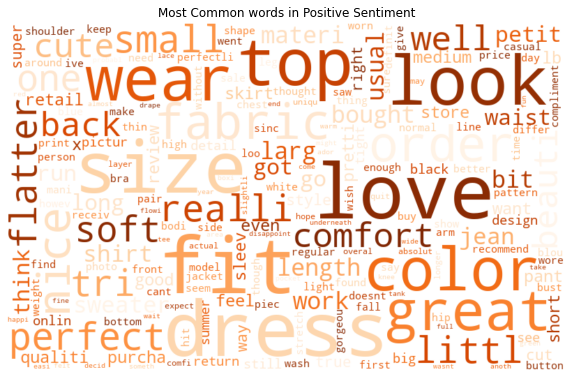

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualisasi untuk sentimen positif menggunakan wordcloud
all_words = ' '.join([text for text in data_pos['Review Text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Oranges',background_color="white",collocations=False, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Positive Sentiment")
plt.show()
plt.savefig("cloud_1.jpg", format="jpg")
plt.show()

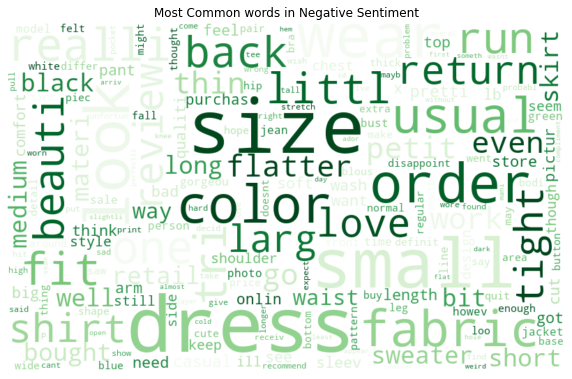

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualisasi untuk sentimen positif menggunakan wordcloud
all_words = ' '.join([text for text in data_neg['Review Text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Greens',background_color="white",collocations=False, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Negative Sentiment")
plt.show()
plt.savefig("cloud_1.jpg", format="jpg")

In [ ]:
#menghitung jumlah kata yang paling banyak muncul
from collections import Counter

# Check the most frequent word
review_vis2 = data.copy()
review_vis2['temp_list'] = review_vis2['Review Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(data=[top.keys(),top.values()]).T
temp.columns = ['Common_words','count']
temp.sort_values(by='count',ascending=False).head(10).reset_index(drop=True)

,Common_words,count
0,dress,10722
1,fit,10139
2,love,9836
3,size,9504
4,look,8280
5,top,7346
6,wear,7166
7,like,6904
8,color,6409
9,great,5272


## Split Data

In [ ]:
modeldata = data[['Review Text', 'Recommended IND']]

In [ ]:
#Train, test sets split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modeldata['Review Text'].values, 
                                                  modeldata['Recommended IND'].values, 
                                                  test_size=0.30, 
                                                  random_state=606, 
                                                  stratify=modeldata['Recommended IND'].values)

## Pembobotan

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_train_tf= vectorizer.fit_transform(X_train)
X_test_tf= vectorizer.transform(X_test)

## Klasifikasi 

In [ ]:
#klasifikasi dengan beberapa machine learning
svm = LinearSVC(C = 0.5, loss = 'hinge', tol = 1e-5)
lr = SGDClassifier(loss='hinge', class_weight='balanced')

original_models = {
    "Logistic Regression": LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean',n_neighbors = 3),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state = 606, max_depth=50, min_samples_split=25),
    "Support Vector Machine (Linear Kernel)": CalibratedClassifierCV(svm),
    "Support Vector Machine (RBF Kernel)": SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                  decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf',
                  max_iter=-1, probability=True, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=50, min_samples_split=25, criterion = 'entropy', random_state=606),
}

for name, model in original_models.items():
  model.fit(X_train_tf, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [ ]:
import sklearn.metrics as metrics

In [ ]:
#menampilkan hasil klasifikasi
original_results = []
data = []
columns = ["Accuracy", "Precision", "Recall", "F1-Score"]

for name, model in original_models.items():
  result = model.score(X_test_tf, y_test)
  original_results.append(result)

  print("""
  __________________________"""+name+"""__________________________
  """)

  model = original_models[name]
  y_test_pred = model.predict(X_test_tf)
  arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
  
  accuracy = model.score(X_test_tf, y_test)
  precision = metrics.precision_score(y_test, y_test_pred, average='macro')
  recall = metrics.recall_score(y_test, y_test_pred, average='macro')
  f1_score = metrics.f1_score(y_test_pred, y_test, average='macro')

  values = [accuracy, precision, recall, f1_score]
  zipped = zip(columns, values)
  a_dictionary = dict(zipped)
  ##print(a_dictionary)
  data.append(a_dictionary)

  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(result * 100))


  __________________________Logistic Regression__________________________
  
[[ 522  551]
 [ 150 4676]]
              precision    recall  f1-score   support

           0       0.78      0.49      0.60      1073
           1       0.89      0.97      0.93      4826

    accuracy                           0.88      5899
   macro avg       0.84      0.73      0.76      5899
weighted avg       0.87      0.88      0.87      5899

Logistic Regression: 88.11663%

  __________________________K-Nearest Neighbors__________________________
  
[[ 351  722]
 [ 244 4582]]
              precision    recall  f1-score   support

           0       0.59      0.33      0.42      1073
           1       0.86      0.95      0.90      4826

    accuracy                           0.84      5899
   macro avg       0.73      0.64      0.66      5899
weighted avg       0.81      0.84      0.82      5899

K-Nearest Neighbors: 83.62434%

  __________________________Decision Tree__________________________
  
[[

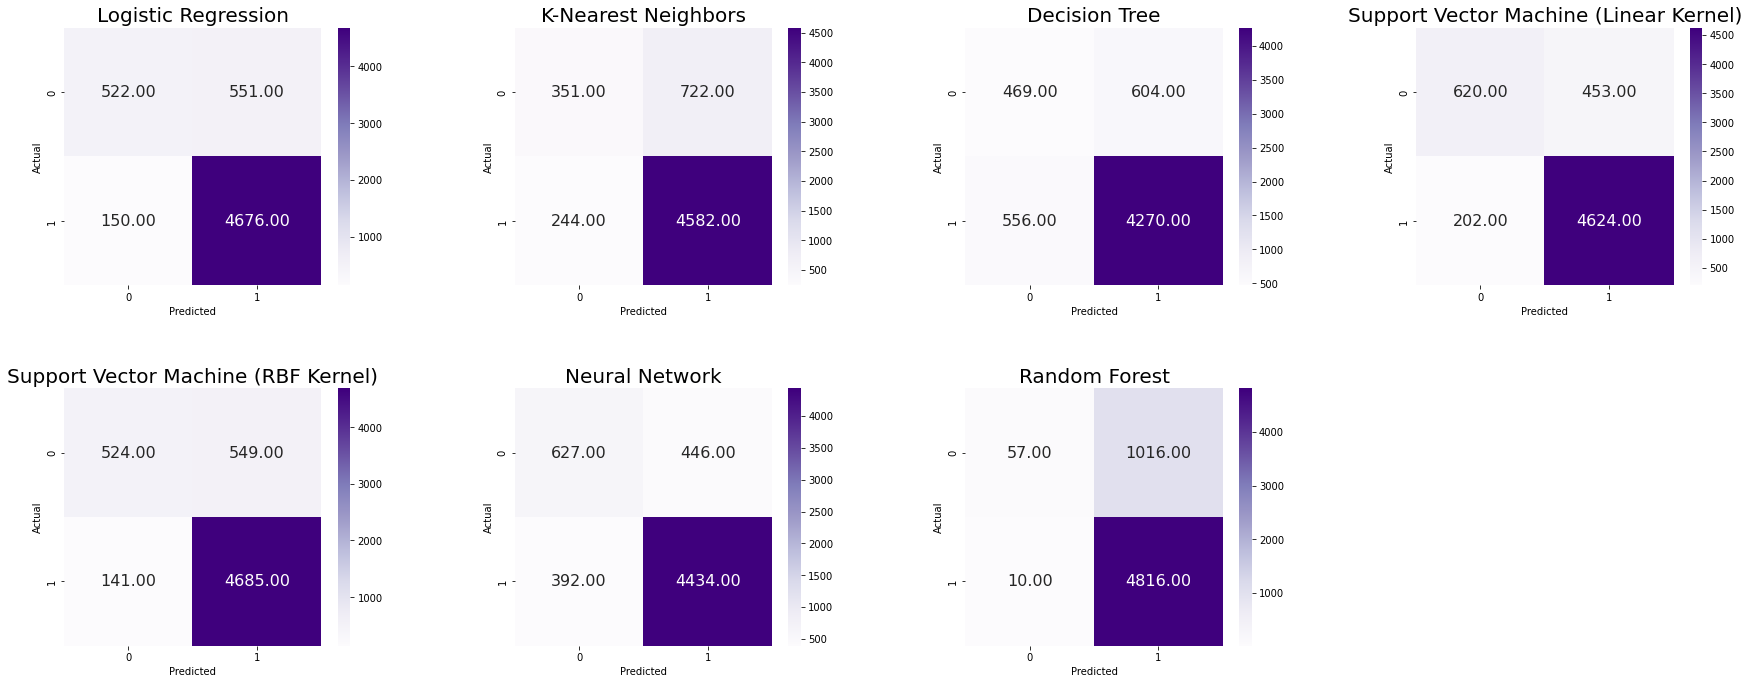

In [ ]:
# menampilkan confusion matrix untuk tiap klasifikasi

a = 3  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30, 18))

for name, model in original_models.items():
    original_results = model.score(X_test_tf, y_test)
    model = original_models[name]
    y_test_pred = model.predict(X_test_tf)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx0 = confusion_matrix(y_test, y_test_pred)

    heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm0.index.name = 'Actual'
    heat_cm0.columns.name = 'Predicted'

    plt.subplot(a, b, c)
    #plt.title(name)
    fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
    sns.heatmap(heat_cm0, annot=True, fmt='.2f', square=True, annot_kws={"size": 16}, cmap = 'Purples').set_title(name, fontsize = 20)
    c = c + 1

plt.show()

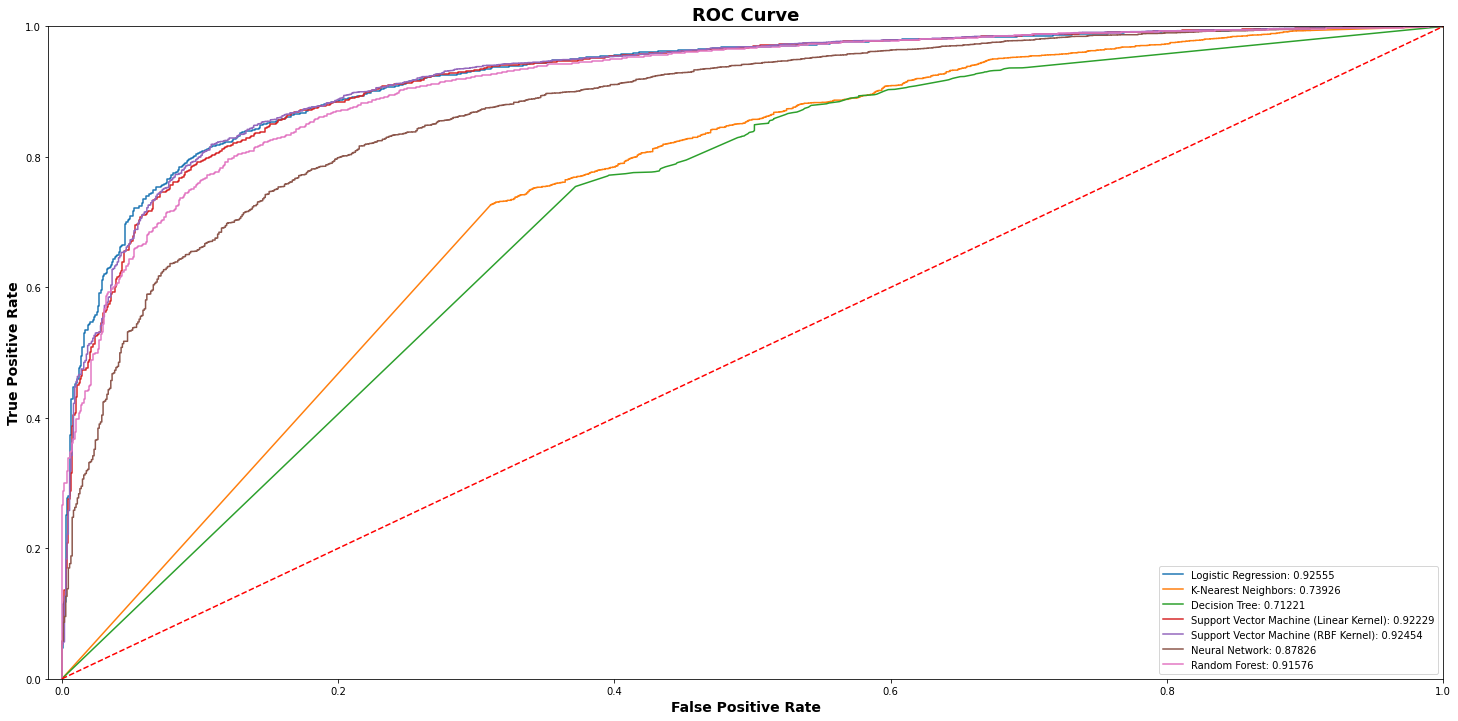

In [ ]:
#membuat roc curve
fig, ax = plt.subplots()
fig.set_size_inches(25,12)

for m in original_models:
    y_train_pred = original_models[m].predict_proba(X_train_tf)
    y_test_pred = original_models[m].predict_proba(X_test_tf)
    fpr, tpr, thresholds_nb = roc_curve(y_test, y_test_pred[::,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_test_pred[::,1],pos_label=1)
    plt.plot(fpr, tpr, label= m + ': {:.5f}'.format(roc_auc_score(y_test, y_test_pred[::,1])))
plt.plot([0, 1], [0, 1], 'r--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc='best')
plt.show()

## Kesimpulan
1. Kata yang sering ditulis customer pada review positif adalah love, perfect, fit, top, color
2. Kata yang sering ditulis customer pada review negatif adalah bad, disappoint, wrong, sad
3. SVM (Linear Kernel) menjadi metode yang paling akurat dalam mengklasifikasikan review customer dengan recall score 96% dan akurasi 89%.


## Rekomendasi

1. Untuk perusahaan diharapkan bisa memperbaiki kualitas produk mereka mengingat banyak customer yang memberikan review negatif yang berdampak pada ketidakmauan customer memberikan rekomendasi.
2. Perusahaan bisa menggunakan SVM linear kernel untuk mengklasikasikan review customer
3. Analisis sentimen ini berguna untuk diterapkan pada Brand/Product Reputation Analysis, Competitor Analysis, Customer Service Analysis, dan Trend/Event Analysis


